In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt

In [2]:
start = dt.datetime(2021,6,1)
end = dt.datetime(2022,1,28)
# stk_data = gh(symbol = 'TATACOFFEE', start=start, end=end)
stk_data = pd.read_csv("Tatacoffee13_21.csv", index_col='Date')

In [3]:
# stk_data = stk_data[["Open","High","Low","Close"]]
stk_data

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [4]:
column = "Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1=Ms.fit_transform(stk_data[[column]])
print("len:",data1.shape)

len: (2225, 1)


In [ ]:
# training_size = round(len(data1)*0.95)
# print("training_size-",training_size)
# x_train = data1[:training_size]
# x_test = data1[training_size:]
# print("x_train-",x_train.shape)
# print("x_test-",x_test.shape)
# y_train = data1[:training_size]
# y_test = data1[training_size:]
# print("y_train-",y_train.shape)
# print("y_test-",y_test.shape)

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
orders = [(1,2,1),(1,1,2),(2,3,1),(2,2,2)]
from statsmodels.tsa.arima.model import ARIMA

for i in orders:
    #print(td)
    model = ARIMA(data1,order=i)
    model_fit = model.fit()
    y_pred = model_fit.predict(0,len(data1)-1)
    
    from sklearn.metrics import r2_score
    mse = mean_squared_error(data1, y_pred)
    #print(y_pred)

    print("Order={}".format(i))
    rmse = np.sqrt(mean_squared_error(data1, y_pred))
    print("RMSE:", rmse)

    mape = mean_absolute_percentage_error(data1, y_pred)
    print("MAPE:", mape)
    print("***********")

C:\Users\Pragadeesh K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order=(1, 2, 1)
RMSE: 0.02388896329153155
MAPE: 1861343602.112032
***********


C:\Users\Pragadeesh K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order=(1, 1, 2)
RMSE: 0.022885202880894368
MAPE: 2415748899.1819983
***********
Order=(2, 3, 1)
RMSE: 0.028959576964943123
MAPE: 1573655209.702421
***********
Order=(2, 2, 2)
RMSE: 0.024011545029307975
MAPE: 303079299.54228383
***********


In [8]:
len(y_pred)

2225

In [9]:
order=(1, 1, 2)
model = ARIMA(data1,order=order)
model_fit = model.fit()
y_pred = model_fit.predict(0,len(data1)-1)
from sklearn.metrics import r2_score
mse = mean_squared_error(data1,y_pred)
print("Order={}".format(order))
rmse = np.sqrt(mean_squared_error(data1, y_pred))
print("RMSE:", rmse)
mape = mean_absolute_percentage_error(data1, y_pred)
print("MAPE:", mape)

Order=(1, 1, 2)
RMSE: 0.022885202880894368
MAPE: 2415748899.1819983


C:\Users\Pragadeesh K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


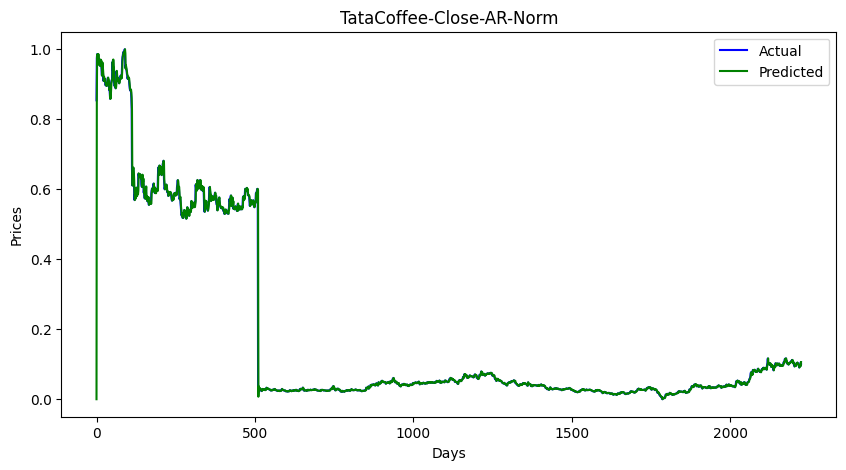

In [10]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [11]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,[column])
actual_stock_price_test_ori = Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = conversionSingle(actual_stock_price_test_ori,[column])

In [12]:
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori = Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriA = conversionSingle(predicted_stock_price_test_ori,[column])

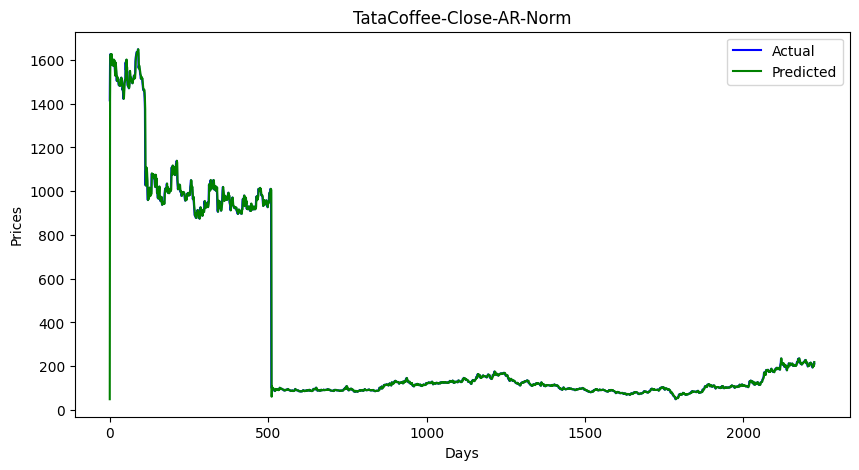

In [13]:
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriA,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [14]:
rmse = np.sqrt(mean_squared_error(actual_stock_price_test_oriA, predicted_stock_price_test_oriA))
print("RMSE:", rmse)
mape = mean_absolute_percentage_error(actual_stock_price_test_oriA, predicted_stock_price_test_oriA)
print("MAPE:", mape)

RMSE: 36.58886236597391
MAPE: 0.019578688122264806


In [15]:
forecast = model_fit.predict(len(data1),len(data1)+3)
forecast

array([0.10167644, 0.10166061, 0.10164781, 0.10163747])

In [16]:
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori = Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriA = conversionSingle(forecast_stock_price_test_ori,["Closefore"])
forecast_stock_price_test_oriA

,Closefore
0,211.960295
1,211.934983
2,211.914527
3,211.897994


In [17]:
forecast_stock_price_test_oriA.to_csv("CloseARIMA.csv",index=False)